In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import datetime as dt


file_accepted = "accepted_2007_to_2018Q4.csv"

# Read Purchasing File and store into Pandas data frame
acc_data = pd.read_csv(file_accepted)

C:\Users\KatharineHollars\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
acc_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#check names of all columns in the data to begin clean up
for col in acc_data.columns:
    print (col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [28]:
#drop all nonessential columns (from 150 columns to 27)
loans_df = acc_data[['loan_amnt', 'term', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'fico_range_high', 'application_type',]]
loans_df

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,loan_status,fico_range_high,application_type
0,3600.0,36 months,C,10+ years,MORTGAGE,55000.0,Fully Paid,679.0,Individual
1,24700.0,36 months,C,10+ years,MORTGAGE,65000.0,Fully Paid,719.0,Individual
2,20000.0,60 months,B,10+ years,MORTGAGE,63000.0,Fully Paid,699.0,Joint App
3,35000.0,60 months,C,10+ years,MORTGAGE,110000.0,Current,789.0,Individual
4,10400.0,60 months,F,3 years,MORTGAGE,104433.0,Fully Paid,699.0,Individual
...,...,...,...,...,...,...,...,...,...
2260696,40000.0,60 months,B,9 years,MORTGAGE,227000.0,Current,709.0,Individual
2260697,24000.0,60 months,C,6 years,RENT,110000.0,Charged Off,664.0,Individual
2260698,14000.0,60 months,C,10+ years,MORTGAGE,95000.0,Current,664.0,Individual
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#check datatype of certain columns
columnpDatatype = acc_data.dtypes['id']
print(columnpDatatype)

object


In [48]:
#drop rows with NaaN value left with ~2 million rows
loans_df.dropna(how='any')

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,loan_status,fico_range_high,application_type
0,3600.0,36 months,C,10+ years,MORTGAGE,55000.0,Fully Paid,679.0,Individual
1,24700.0,36 months,C,10+ years,MORTGAGE,65000.0,Fully Paid,719.0,Individual
2,20000.0,60 months,B,10+ years,MORTGAGE,63000.0,Fully Paid,699.0,Joint App
3,35000.0,60 months,C,10+ years,MORTGAGE,110000.0,Current,789.0,Individual
4,10400.0,60 months,F,3 years,MORTGAGE,104433.0,Fully Paid,699.0,Individual
...,...,...,...,...,...,...,...,...,...
2260694,24000.0,60 months,C,7 years,MORTGAGE,95000.0,Current,669.0,Individual
2260695,24000.0,60 months,B,10+ years,MORTGAGE,108000.0,Current,699.0,Individual
2260696,40000.0,60 months,B,9 years,MORTGAGE,227000.0,Current,709.0,Individual
2260697,24000.0,60 months,C,6 years,RENT,110000.0,Charged Off,664.0,Individual


In [31]:
loans_df.to_csv('clean_loans.csv')

In [32]:
loans_df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [33]:
loans_filtered=loans_df[(loans_df['loan_status'] == 'Fully Paid') | (loans_df['loan_status'] == 'Charged Off')]

In [34]:
loans_filtered['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [35]:
loans_filtered

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,loan_status,fico_range_high,application_type
0,3600.0,36 months,C,10+ years,MORTGAGE,55000.0,Fully Paid,679.0,Individual
1,24700.0,36 months,C,10+ years,MORTGAGE,65000.0,Fully Paid,719.0,Individual
2,20000.0,60 months,B,10+ years,MORTGAGE,63000.0,Fully Paid,699.0,Joint App
4,10400.0,60 months,F,3 years,MORTGAGE,104433.0,Fully Paid,699.0,Individual
5,11950.0,36 months,C,4 years,RENT,34000.0,Fully Paid,694.0,Individual
...,...,...,...,...,...,...,...,...,...
2260688,18000.0,60 months,B,5 years,OWN,130000.0,Fully Paid,739.0,Individual
2260690,29400.0,60 months,C,9 years,MORTGAGE,180792.0,Fully Paid,709.0,Individual
2260691,32000.0,60 months,C,3 years,MORTGAGE,157000.0,Charged Off,739.0,Individual
2260692,16000.0,60 months,C,10+ years,RENT,150000.0,Fully Paid,669.0,Individual


In [36]:
loans_filtered.head()


,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,loan_status,fico_range_high,application_type
0,3600.0,36 months,C,10+ years,MORTGAGE,55000.0,Fully Paid,679.0,Individual
1,24700.0,36 months,C,10+ years,MORTGAGE,65000.0,Fully Paid,719.0,Individual
2,20000.0,60 months,B,10+ years,MORTGAGE,63000.0,Fully Paid,699.0,Joint App
4,10400.0,60 months,F,3 years,MORTGAGE,104433.0,Fully Paid,699.0,Individual
5,11950.0,36 months,C,4 years,RENT,34000.0,Fully Paid,694.0,Individual


<AxesSubplot:>

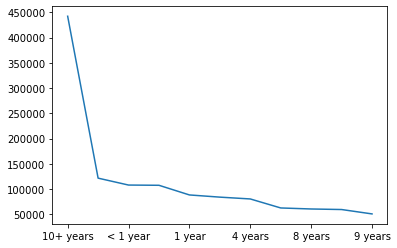

In [37]:
loans_filtered["emp_length"].value_counts().plot()

In [38]:
loans_filtered=loans_df[(loans_df['emp_length'] != '10+ years')]

<AxesSubplot:>

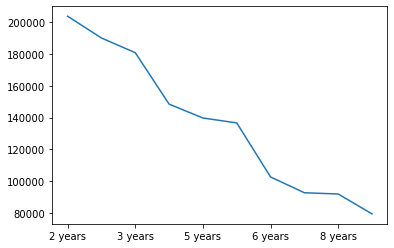

In [39]:
loans_filtered["emp_length"].value_counts().plot()

In [40]:
loans_filtered["emp_length_int"] = loans_filtered["emp_length"].str.split(" ", expand = True)[0]


<ipython-input-40-b0aa16389607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_filtered["emp_length_int"] = loans_filtered["emp_length"].str.split(" ", expand = True)[0]


In [41]:
loans_filtered.head()

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,loan_status,fico_range_high,application_type,emp_length_int
4,10400.0,60 months,F,3 years,MORTGAGE,104433.0,Fully Paid,699.0,Individual,3
5,11950.0,36 months,C,4 years,RENT,34000.0,Fully Paid,694.0,Individual,4
8,10000.0,36 months,A,6 years,RENT,85000.0,Fully Paid,689.0,Individual,6
10,22400.0,60 months,C,6 years,MORTGAGE,95000.0,Current,714.0,Individual,6
11,16000.0,60 months,C,1 year,MORTGAGE,70000.0,Current,724.0,Individual,1


In [45]:
loans_filtered["emp_length_int"].value_counts()

2    203677
0    189988
3    180753
1    148403
5    139698
4    136605
6    102628
7     92695
8     91914
9     79395
Name: emp_length_int, dtype: int64

In [46]:
loans_filtered["emp_length_int"].replace({"<": "0"}, inplace=True)

In [47]:
loans_filtered.to_csv('clean__filtered_loans.csv')